# <font color='Purple'>Ciência dos Dados</font>
# <font color='blue'>#NaPrática</font>

# <font color='blue'>Machine Learning </font>

# Métodos Ensemble - Boosting e Voting 

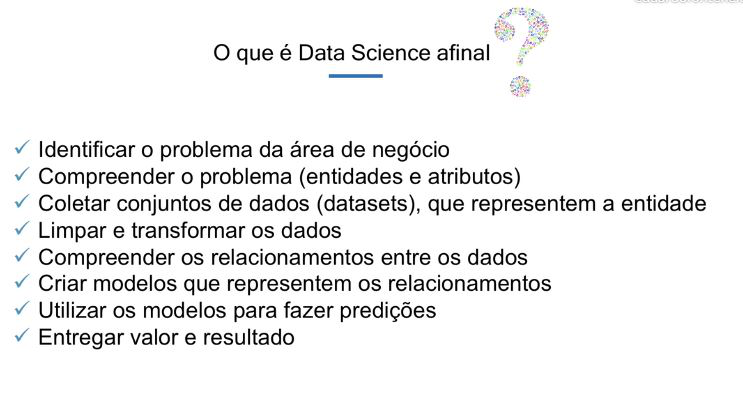

In [1]:
from PIL import Image
%matplotlib inline
im = Image.open("estapas.JPG")
im.show()
im 


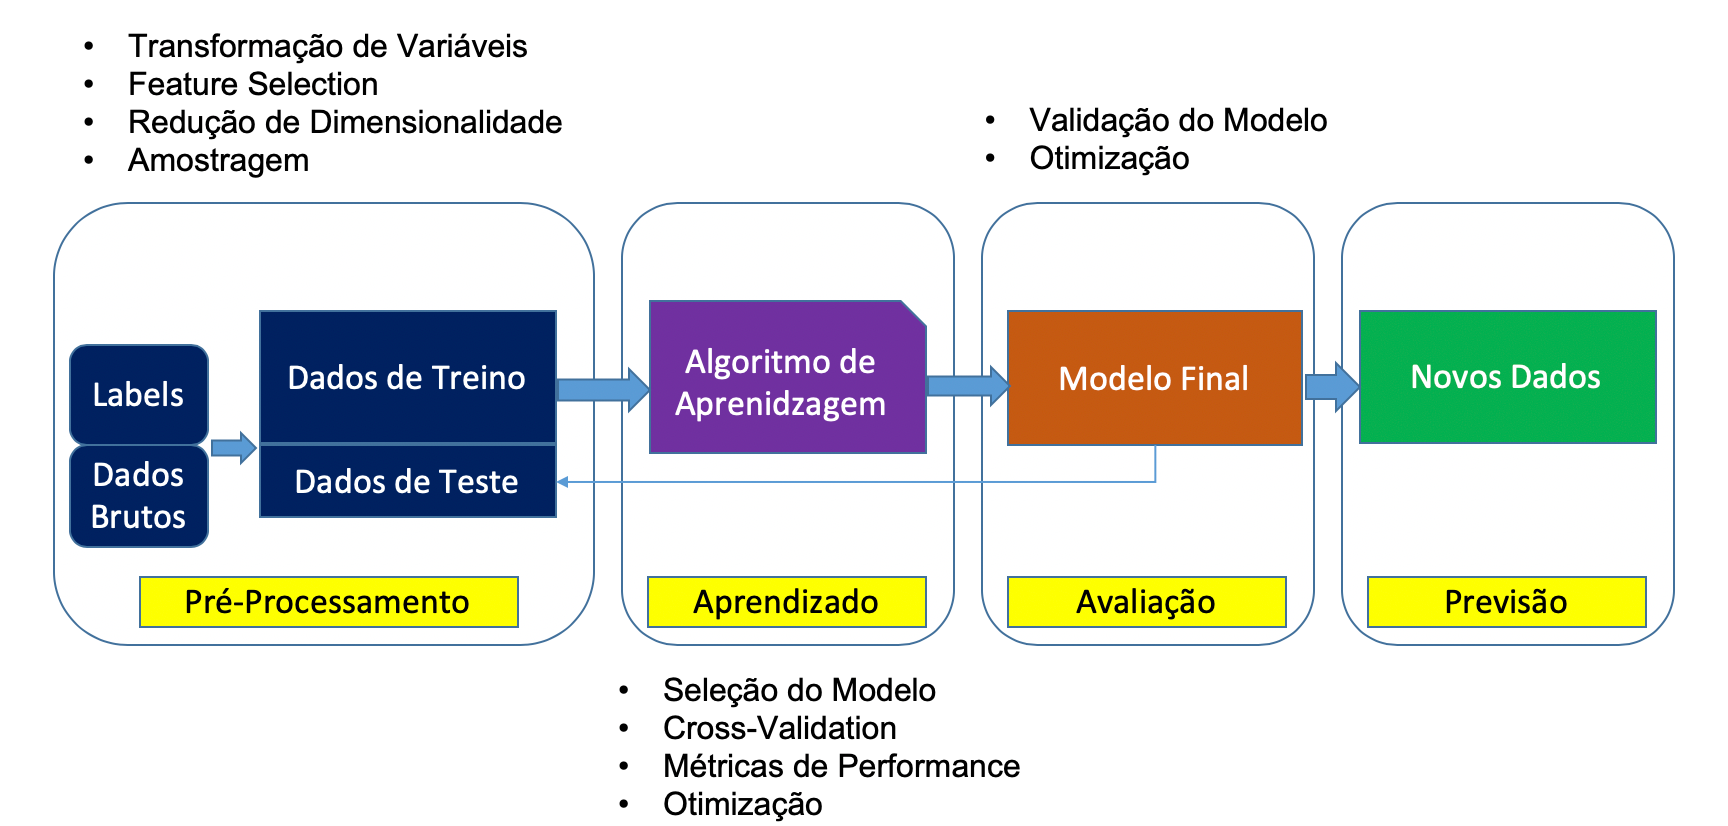

In [4]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/processo.png")
im.show()
im 


## Definição do Problema de Negócio

Vamos criar um modelo preditivo que seja capaz de prever se uma pessoa pode ou não desenvolver diabetes. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo.

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes. 

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

# Tipos de Métodos Ensemble

Métodos Ensemble permitem aumentar consideravelmente o nível de precisão nas suas previsões. Veremos como criar alguns dos Métodos Ensemble mais poderosos em Python. Existem 3 métodos principais para combinar previsões a partir de diferentes modelos:

**Bagging** - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.

**Boosting** - Para construção de múltiplos modelos (normalmente do mesmo tipo), onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior, dentro da sequência de modelos criados.

**Voting** - Para construção de múltiplos modelos (normalmente de tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões.

### Modelo Baseline - Naive Bayes

Algoritmo Não-Linear. Calcula a Probabilidade de cada classe e a probabilidade condicional de cada classe dado uma variável de entrada. As probabilidades são então estimadas para os novos dados e multiplicadas, assumindo que são independentes (suposição simples ou Naive). Assume dados em distirbuição Gaussiana (Normal)

In [7]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.914


### Gradient Boosting

Também chamado Stochastic Gradient Boosting, é um dos métodos Ensemble mais sofisticados.

In [6]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.049


### Voting Ensemble

Este é um dos métodos Ensemble mais simples. Este método cria dois ou mais modelos separados a partir do dataset de treino. O Classificador Voting então utiliza a média das previsões de cada sub-modelo para fazer as previsões em novos conjuntos de dados. As previsões de cada sub-modelo podem receber pesos, através de parâmetros definidos manualmente ou através de heurística. 

In [8]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando os modelos
estimators = []

modelo1 = LogisticRegression()
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))

modelo3 = SVC()
estimators.append(('svm', modelo3))

# Criando o modelo ensemble
ensemble = VotingClassifier(estimators)

# Cross Validation
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

# Resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.957


# Fim

### #Facebook - Ciência dos Dados - <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdados">https://t.me/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="300" height="200" src="https://www.youtube.com/embed/EbxV4I0BkXk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')